In [1]:
## Import libraries
import sys
import numpy as np
from ipywidgets import interactive
import matplotlib.pyplot as plt

sys.path.insert(0, "./src")

from gratings import grating_model
from plotting import plot_data, plot_mean_against_index, show_feature, receptive_fields
from persistence import persistence
from decoding import cohomological_parameterization, remove_feature
from noisereduction import PCA_reduction, top_noise_reduction, z_cutoff

In [2]:
## Generate data
data = grating_model(Nn=5, Np=(15, 1, 25, 1), deltaT=100, random_neurons=False)

Simulating data points: 100%|██████████| 375/375 [00:05<00:00, 67.76it/s]


Mean spike count: 38.987093333333334


In [3]:
## Apply noise reduction
data = PCA_reduction(data, 12)
data = z_cutoff(data, 2)

# data = top_noise_reduction(data, n=100, omega=0.5, fraction=0.9, plot_history=True)

PCA explained variance:
[0.2197818  0.21886225 0.18197344 0.15502945 0.07958727 0.01734901
 0.01628323 0.00921769 0.00891807 0.00797182 0.0076437  0.00736297]
13 datapoints with Z-score above 2 removed


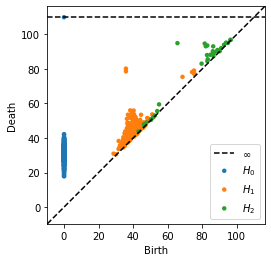

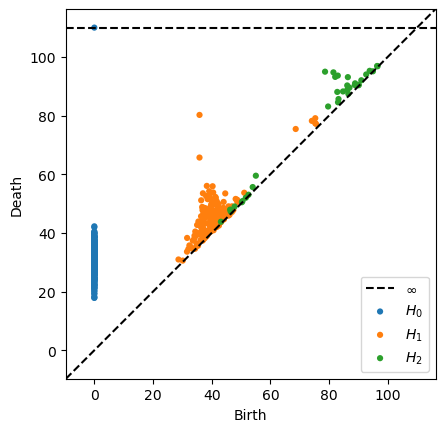

In [4]:
## Determine topological shape
persistence(data, homdim=2, coeff=2)
persistence(data, homdim=2, coeff=3)

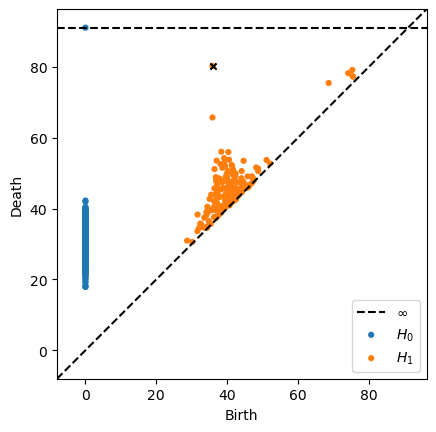

Averaging images: 100%|██████████| 362/362 [00:01<00:00, 283.17it/s]


Number of images averaged over:
[37. 36. 36. 36. 36. 36. 36. 37. 36. 36.]


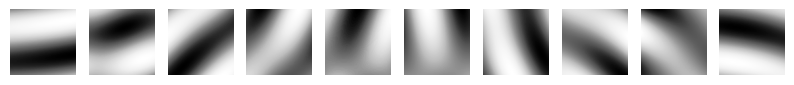

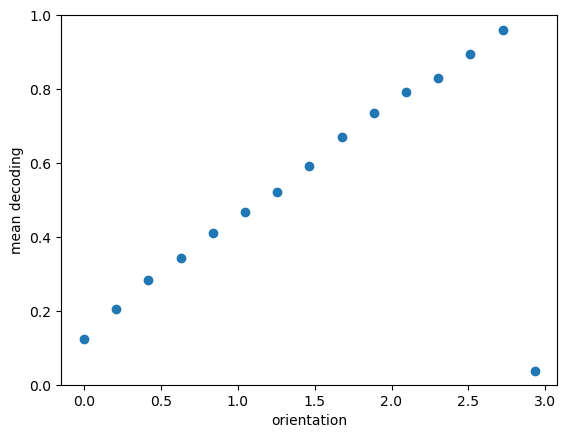

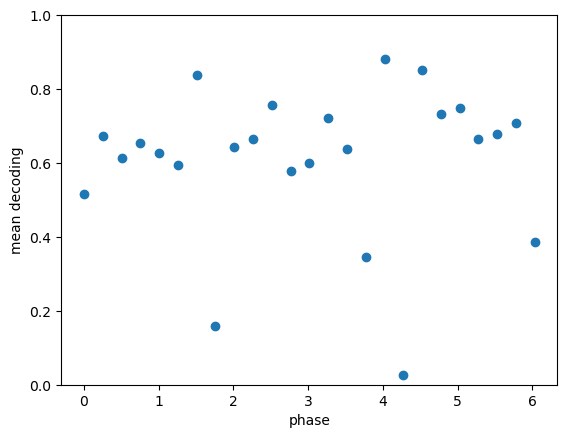

In [5]:
## Decode first parameter
decoding1 = cohomological_parameterization(data, coeff=23)
images = show_feature(decoding1, Nimages=10)
interactive(
    lambda n: plt.imshow(images[n], "gray", vmin=-1, vmax=1), n=(0, len(images) - 1, 1)
)
plot_mean_against_index(data, decoding1, "orientation")
plot_mean_against_index(data, decoding1, "phase")
# plot_data(
#     data,
#     transformation="PCA",
#     labels=decoding1,
#     colors=["Twilight", "Viridis", "Twilight", "Viridis", "Twilight"],
# )

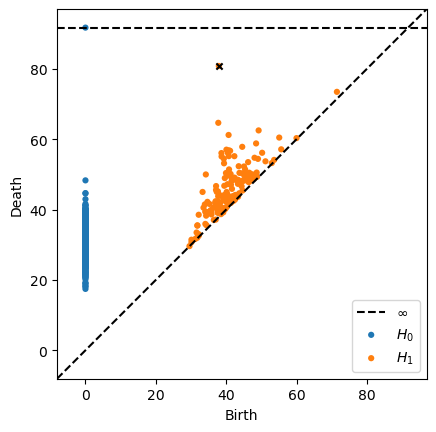

Averaging images: 100%|██████████| 362/362 [00:01<00:00, 284.13it/s]


Number of images averaged over:
[37. 36. 36. 36. 36. 36. 36. 37. 36. 36.]


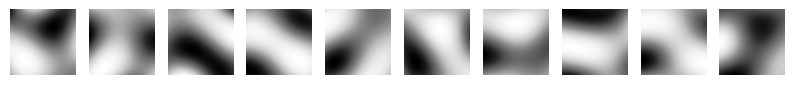

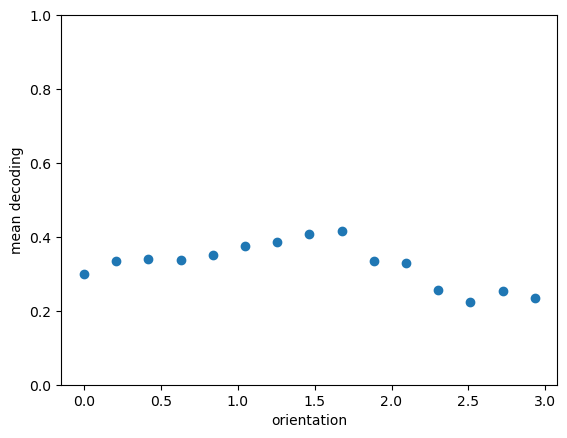

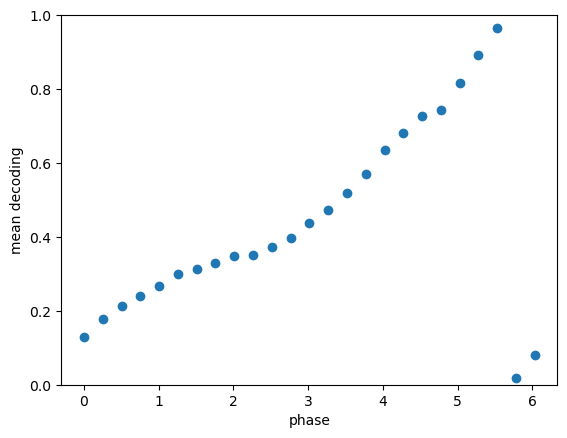

In [6]:
## Decode second parameter
reduced_data = remove_feature(data, decoding1, cut_amplitude=0.5)
decoding2 = cohomological_parameterization(reduced_data, coeff=23)
show_feature(decoding2)
plot_mean_against_index(data, decoding2, "orientation")
plot_mean_against_index(data, decoding2, "phase")
# plot_data(
#     data,
#     transformation="PCA",
#     labels=decoding2,
#     colors=["Twilight", "Viridis", "Twilight", "Viridis", "Twilight"],
# )

/home/loek/miniconda3/envs/top_vision/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



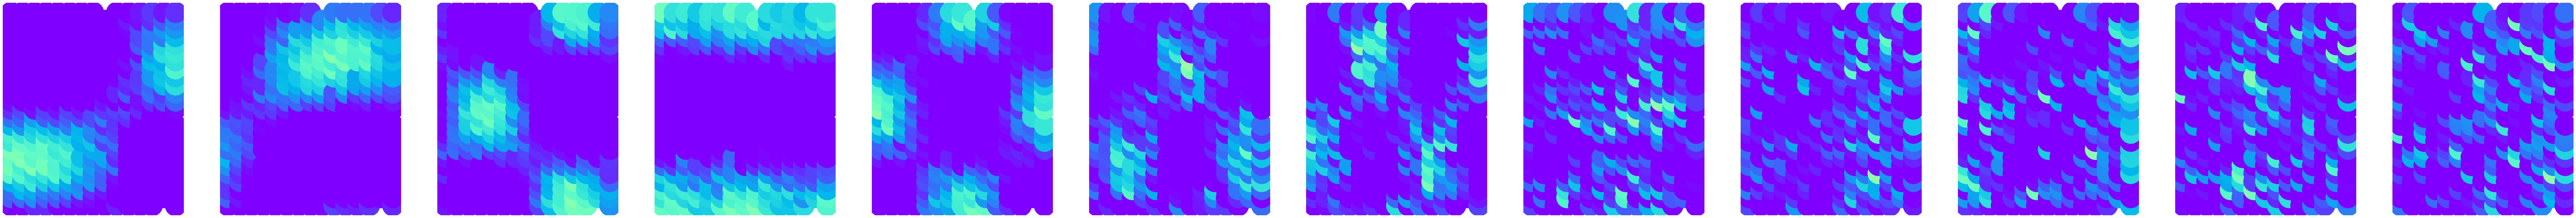

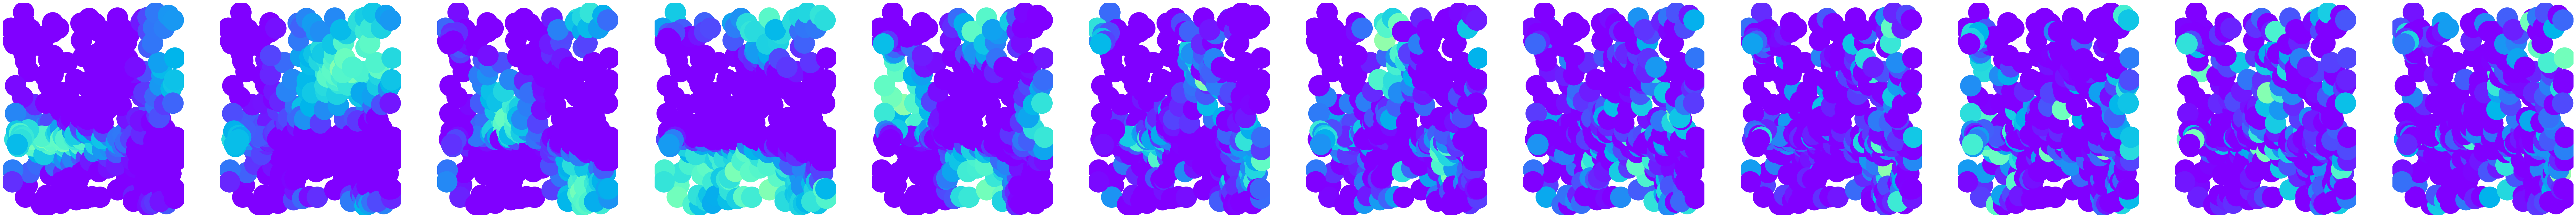

In [11]:
## Plot external receptive fields of the neurons
receptive_fields(
    data,
    data.reset_index()["orientation"] / np.pi,
    data.reset_index()["phase"] / 2 * np.pi,
)
## Plot internal receptive fields of the neurons
receptive_fields(
    data,
    decoding1,
    decoding2,
)